In [7]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pickle as pkl
import glob

coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [6]:
cd ..

/home/ck/pythonWorkspace


In [19]:
path = cnst.network_data + 'data/SOMS/saves/'
clim = '_ERA5_clim_mean_srfc.nc'
std = '_ERA5_clim_stddev_srfc.nc'
mcs = '_ERA5_MCS_mean_srfc.nc'

In [21]:
import matplotlib.patches as patches
def draw_map(ax, t, lat, lon, title='', levels=None, quiver=None, contour=None, barlabel=None, cmap='viridis'):
   
    plt.contourf(lon, lat, t, transform=ccrs.PlateCarree(), cmap=cmap, levels=levels, extend='both')
    ax.coastlines()

#     ## quiver list
#     if quiver is not None:
#         qu = ax.quiver(quiver['x'], quiver['y'], quiver['u'], quiver['v'],scale=quiver['scale'], width=0.003, headwidth=3.2)
    
    
        ## additional contour on plot   
    #contour=None
    if contour is not None:
        contours = ax.contour(contour['x'], contour['y'], contour['data'], levels=contour['levels'], colors='r', linewidths=2 )
        plt.clabel(contours, inline=True, fontsize=7, fmt='%1.1f')
    
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    xl.xlines = False
    xl.ylines=False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--', color='grey');
    
#     rect2 = patches.Rectangle((box[0],box[2]),box[1]-box[0],box[3]-box[2],linewidth=1,edgecolor='green',facecolor='none', zorder=99)
        
#     ax.add_patch(rect2)
    
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label(barlabel)

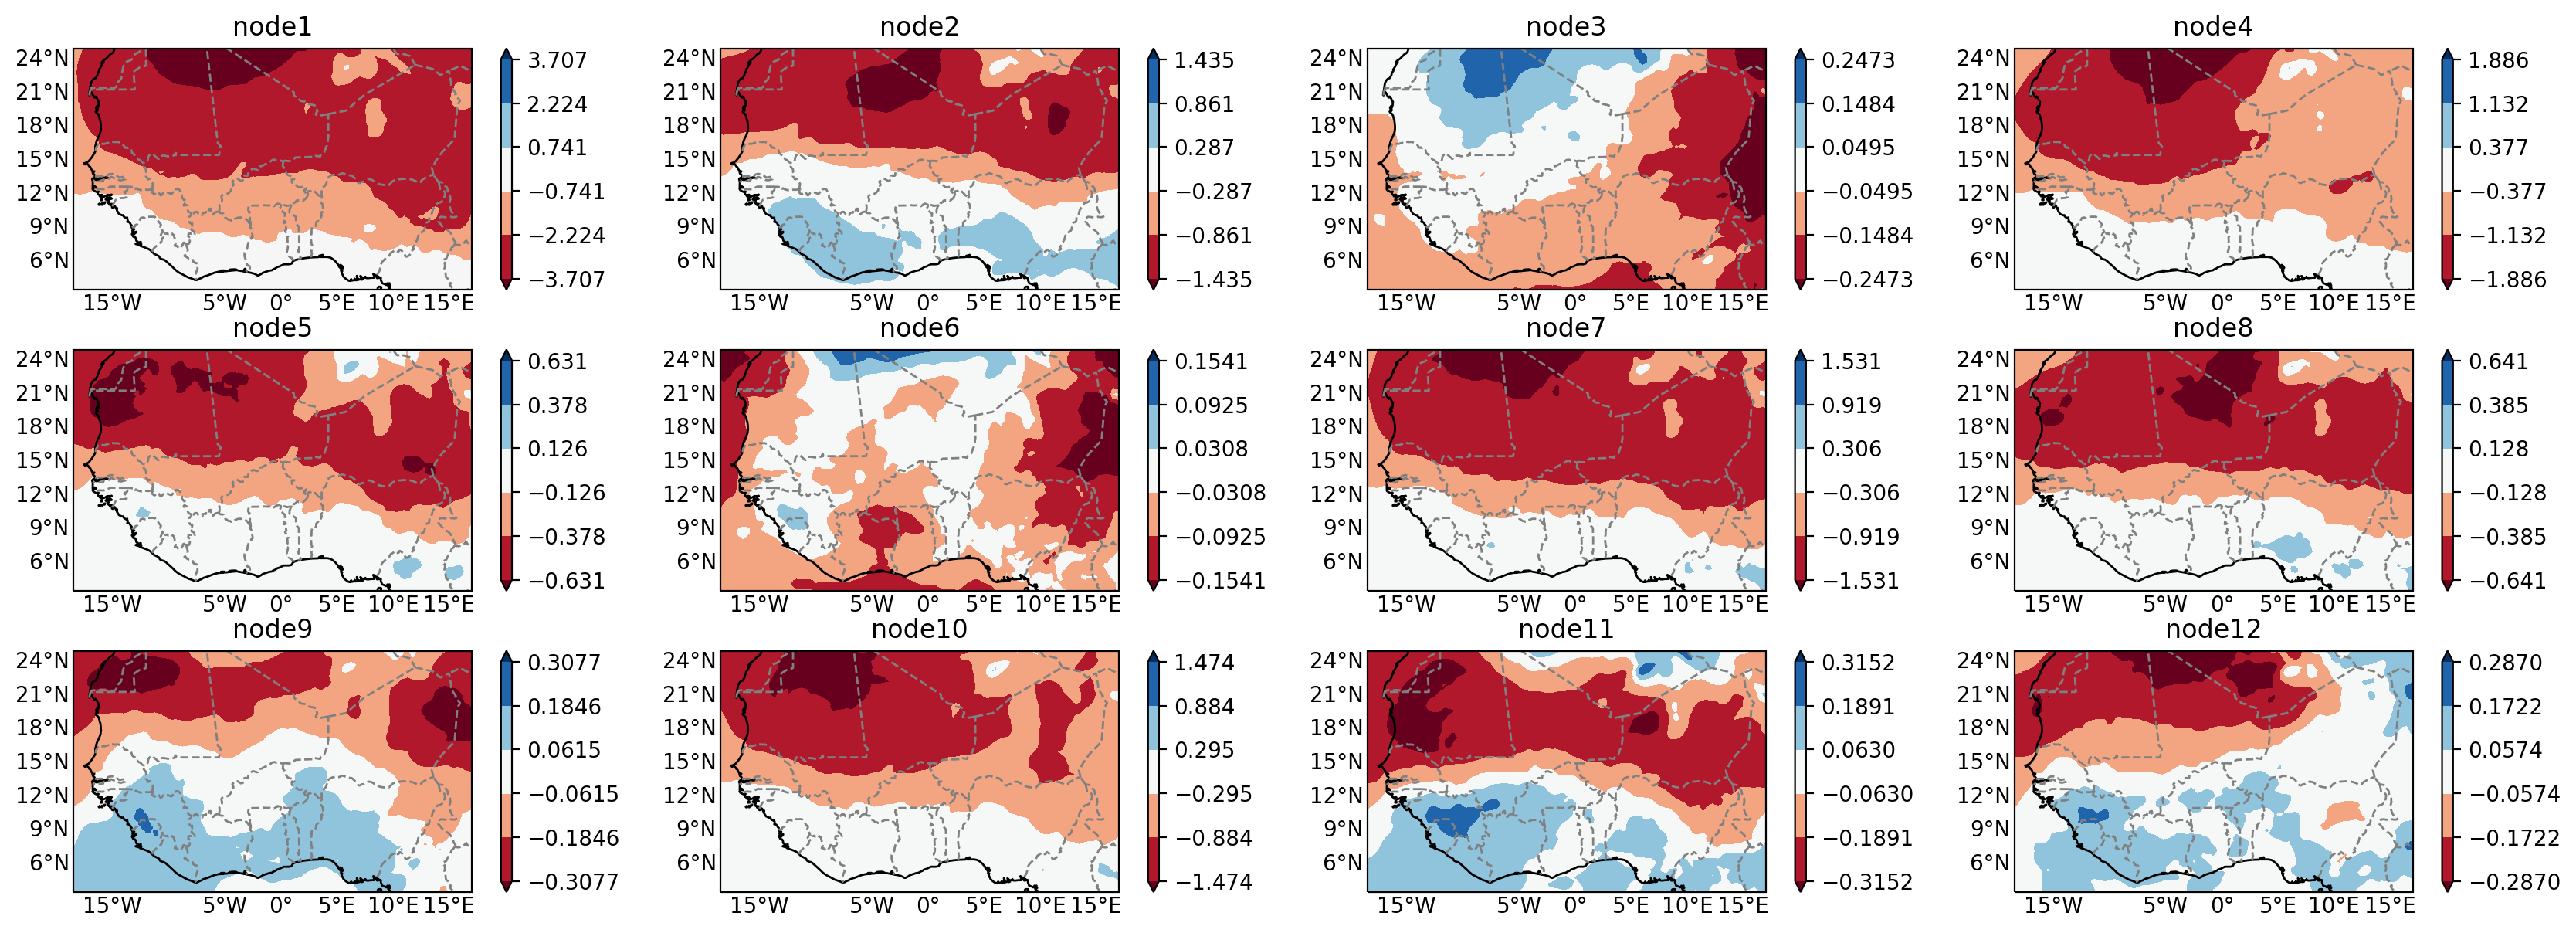

In [47]:
for var in ['msl']: #'tcwv', 'cape', 'u10', 'v10', 'skt', 'tciw', 'd2m', 't2m']:
    f = plt.figure(figsize=(17,6), dpi=200)
    for ni in range(1,13):
        nodestr = 'node'+str(ni)
        ax = f.add_subplot(3,4,ni, projection=ccrs.PlateCarree())
        cc = xr.open_dataset(path+nodestr+clim)
        mm = xr.open_dataset(path+nodestr+mcs)
        stda = xr.open_dataset(path+nodestr+std)

        diff = (mm[var]-cc[var]) /100#
        sd = stda[var]
        
        #ipdb.set_trace()
        #levs = np.linspace(1005,1018,8)

        edge = np.max([np.abs(np.percentile(diff,5)),np.abs(np.percentile(diff,95))])
        levs = np.linspace(edge*-1,edge,6)

        draw_map(ax, diff, diff.latitude, diff.longitude, title=nodestr, levels=levs, barlabel='', cmap='RdBu')

        #diff.plot()

    plt.tight_layout()
    f.savefig(cnst.network_data + 'figs/SOMS/'+str(var)+'_anomaly_per_node.jpg')